# 0. Intro

# 1.

In [210]:

# oversample数据的比例
P = 0.5

# Target data
target_path = r"../data/targets"
# target_path = r"../data/targets_5"

# data keys
data_key_path = "../data/target_datakey.csv"

import os
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

from scipy.spatial.distance import cdist

In [211]:
# all_path里有全部的data地址作为list
target_all_path = os.listdir(target_path)


# 2. K-means
## 2.1 执行k-means

In [212]:
index = 2
N_cluster = 3

data_path = os.path.join(target_path,target_all_path[index])
data = pd.read_csv(data_path,encoding="utf-8")
data = np.array(data.iloc[:,0]).reshape(-1, 1)

kmeans = KMeans(n_clusters=N_cluster, random_state=0).fit(data)
# 返回center
centers = np.array(kmeans.cluster_centers_, dtype=int)
# 返回每一点的标签
labels =  pd.DataFrame(kmeans.labels_)
centers


array([[ 287],
       [1245],
       [ 728]])

- 可视化

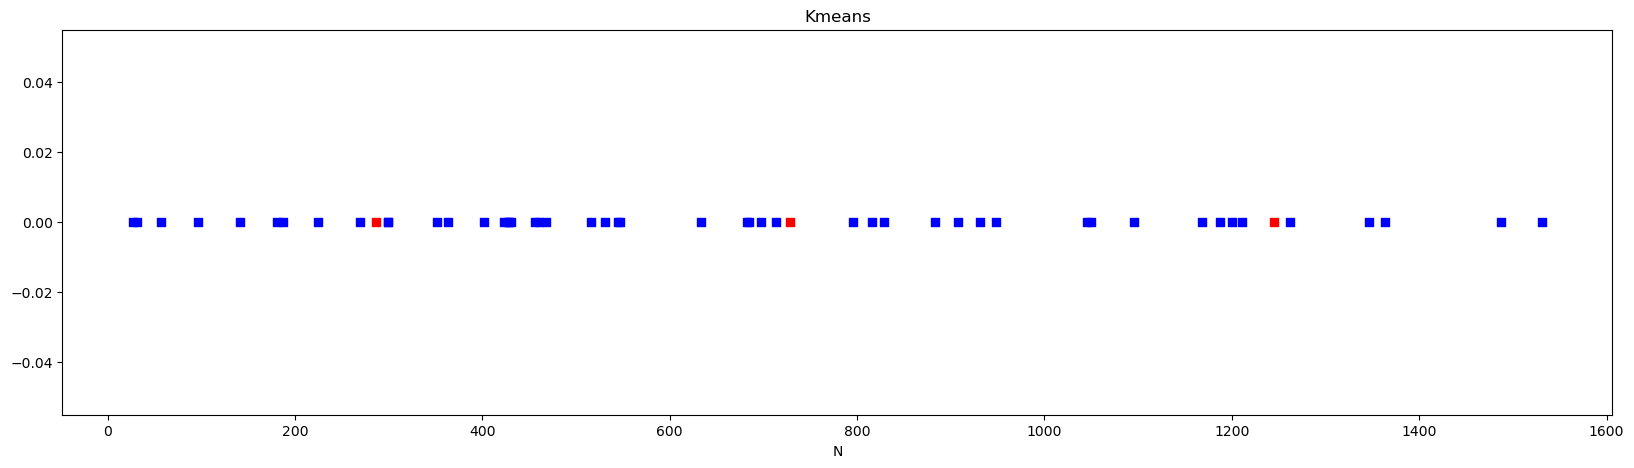

In [213]:
# 可视化
fig = plt.figure(1,figsize=(20,5))
ax = fig.add_subplot(111)

ax.set_title('Kmeans')
plt.xlabel('N')

#画散点图
y1 = np.zeros(data.shape)
y2 = np.zeros(centers.shape)
ax.scatter(data,y1,c='b',marker = ',')
ax.scatter(centers,y2,c='r',marker = ',')

plt.show()

## 2.2 计算dist
1. 计算距离centers的dist

In [214]:
dist_all = cdist(data, centers, metric='cityblock')

# 距离centers的距离
dist = []
for i in range(len(dist_all)):
    dist.append(dist_all[i,kmeans.labels_[i]])
dist = pd.DataFrame(dist)

# N 距离 cluster组合成一个pd
dist_pd = pd.concat([pd.DataFrame(data),dist,labels],axis = 1)
dist_pd.columns = ["N","dist","cluster"]
dist_pd.head()

,N,dist,cluster
0,27,260.0,0
1,32,255.0,0
2,57,230.0,0
3,97,190.0,0
4,141,146.0,0


2. 将centers的坐标以及距离center的最大距离合并，加入table，方便计算prob

In [215]:
# centers坐标
centers_pd = pd.DataFrame(centers)
centers_pd.reset_index(drop=False,inplace=True)
centers_pd.columns = ['cluster','center']

# 每个cluster的dist的最大值最小值
max_dist = pd.DataFrame(dist_pd.groupby("cluster")['dist'].max())
# min_dist = pd.DataFrame(dist_pd.groupby("cluster")['dist'].min())

max_dist.reset_index(drop=False,inplace=True)
# min_dist.reset_index(drop=False,inplace=True)

max_dist.columns = ['cluster','max_dist']
# min_dist.columns = ['cluster','min_dist']

# 每个cluster的dist之和
# sum_dist = pd.DataFrame(dist_pd.groupby("cluster")['dist'].sum())
# sum_dist.reset_index(drop=False,inplace=True)
# sum_dist.columns = ['cluster','sum_dist']


# 合并
centers_pd = pd.merge(centers_pd,max_dist,on='cluster')
# centers_pd = pd.merge(centers_pd,min_dist,on='cluster')
# centers_pd = pd.merge(centers_pd,sum_dist,on='cluster')
centers_pd

,cluster,center,max_dist
0,0,287,260.0
1,1,1245,286.0
2,2,728,220.0


In [216]:
# 合并成一张大表
data_pd = pd.merge(dist_pd,centers_pd,on='cluster',how="left")

data_pd

,N,dist,cluster,center,max_dist
0,27,260.0,0,287,260.0
1,32,255.0,0,287,260.0
2,57,230.0,0,287,260.0
3,97,190.0,0,287,260.0
4,141,146.0,0,287,260.0
5,181,106.0,0,287,260.0
6,187,100.0,0,287,260.0
7,225,62.0,0,287,260.0
8,270,17.0,0,287,260.0
9,299,12.0,0,287,260.0


3. 重新计算dist以及sum

In [217]:
# data_pd['prob'] = (data_pd['dist']-data_pd['min_dist']) / (data_pd['max_dist'] - data_pd['min_dist'])

# 重新量化dist
data_pd['new_dist'] = data_pd['max_dist'] - data_pd['dist']+1

# 重新计算sum
new_sum_dist = pd.DataFrame(data_pd.groupby("cluster")['new_dist'].sum())
new_sum_dist.reset_index(drop=False,inplace=True)
new_sum_dist.columns = ['cluster','new_sum_dist']

data_pd = pd.merge(data_pd,new_sum_dist,on='cluster',how="left")
data_pd

,N,dist,cluster,center,max_dist,new_dist,new_sum_dist
0,27,260.0,0,287,260.0,1.0,2748.0
1,32,255.0,0,287,260.0,6.0,2748.0
2,57,230.0,0,287,260.0,31.0,2748.0
3,97,190.0,0,287,260.0,71.0,2748.0
4,141,146.0,0,287,260.0,115.0,2748.0
5,181,106.0,0,287,260.0,155.0,2748.0
6,187,100.0,0,287,260.0,161.0,2748.0
7,225,62.0,0,287,260.0,199.0,2748.0
8,270,17.0,0,287,260.0,244.0,2748.0
9,299,12.0,0,287,260.0,249.0,2748.0


4. 计算prob:
    - 1.归一化 prob= (x - x_min) / (x_max - x_min)
    - 2.和为1:

In [218]:
data_pd['prob'] = data_pd['new_dist']/data_pd['new_sum_dist']
data_pd

,N,dist,cluster,center,max_dist,new_dist,new_sum_dist,prob
0,27,260.0,0,287,260.0,1.0,2748.0,0.000364
1,32,255.0,0,287,260.0,6.0,2748.0,0.002183
2,57,230.0,0,287,260.0,31.0,2748.0,0.011281
3,97,190.0,0,287,260.0,71.0,2748.0,0.025837
4,141,146.0,0,287,260.0,115.0,2748.0,0.041849
5,181,106.0,0,287,260.0,155.0,2748.0,0.056405
6,187,100.0,0,287,260.0,161.0,2748.0,0.058588
7,225,62.0,0,287,260.0,199.0,2748.0,0.072416
8,270,17.0,0,287,260.0,244.0,2748.0,0.088792
9,299,12.0,0,287,260.0,249.0,2748.0,0.090611


# 3. DA
## 3.1 N_news分配
1. 据cluster大小分配抽样规模,独立的从每个cluster中oversample

In [219]:

# N_news = int(P*len(data))

# 得到每个cluster的规模
cluster_size = np.array(data_pd.groupby("cluster").count().iloc[:,0])
# 根据cluster大小分配抽样规模
N_news_ls = np.array(cluster_size*P,dtype=int)
N_news_ls

array([10,  6,  8])

## 3.2 oversample

In [220]:
new_data = pd.DataFrame()       # 新生成的‘N’

for i in range(kmeans.n_clusters):
    # Get all data in cluster i

    data_i = data_pd[data_pd.loc[:,'cluster'] == i]
    data_i = data_i.reset_index(drop=True)
    # 降序排序,并且重新index一下
    data_i.sort_values(by='prob',ascending = False,inplace = True,ignore_index = True)

    # Sample according to the prob
    new_idx = random.choice(a = data_i.shape[0], p = data_i.prob,size=N_news_ls[i])
    new_data_i = data_i.loc[new_idx,'N'].reset_index(drop=True)

    new_data = pd.concat([new_data,pd.DataFrame(new_data_i)],axis=0)

new_data.reset_index(drop=True, inplace=True)
new_data.shape[0] == N_news_ls.sum()

True

- 可视化

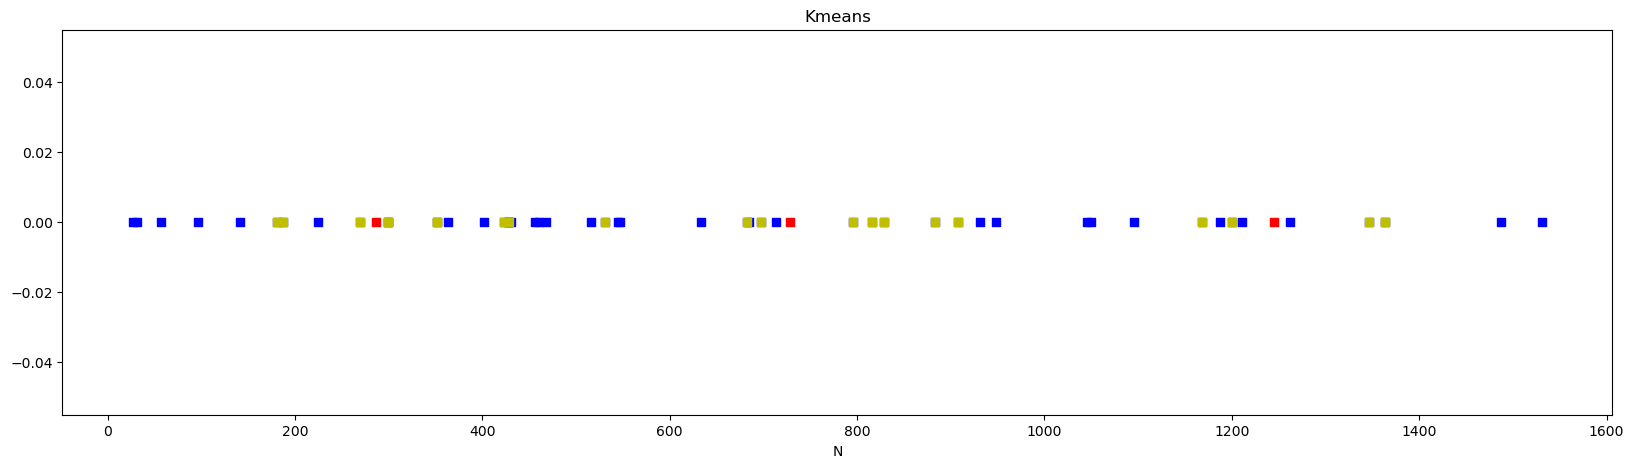

In [221]:
# 可视化
fig = plt.figure(1,figsize=(20,5))
ax = fig.add_subplot(111)

ax.set_title('Kmeans')
plt.xlabel('N')

#画散点图
y1 = np.zeros(data.shape)
y2 = np.zeros(centers.shape)
ax.scatter(data,y1,c='b',marker = ',')
ax.scatter(centers,y2,c='r',marker = ',')

# New added data
y3 = np.zeros(new_data.shape)
ax.scatter(new_data,y3,c='y',marker = ',')

plt.show()

- 可视化两个分布

In [222]:
x_value = np.random.randint(140,180,200)
x2_value = np.random.randint(140,180,100)
x_value.shape
# plt.hist([x_value,x2_value],bins=10,stacked=True)

(200,)

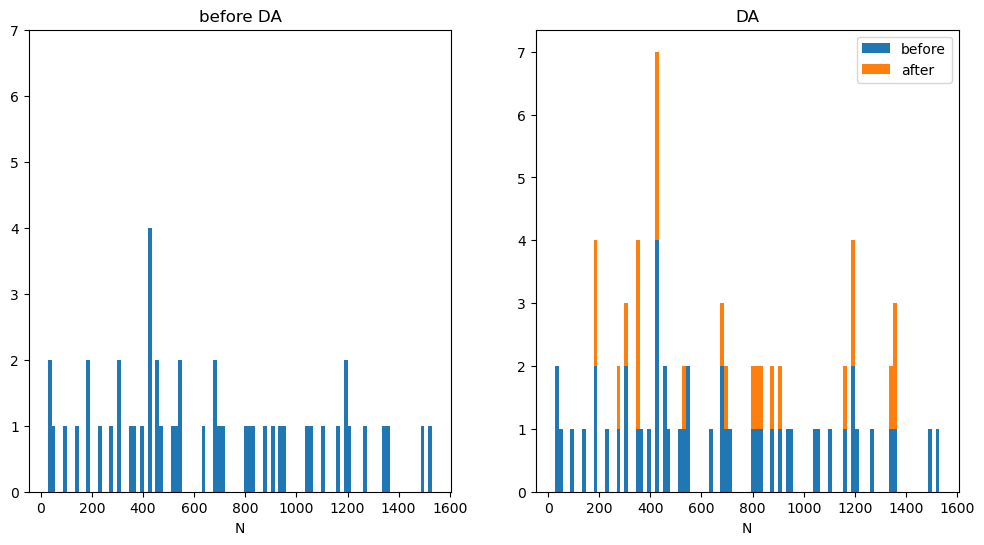

In [230]:
# 可视化
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(121)
ax.set_title('before DA')
plt.xlabel('N')
ax.set_ylim([0,7])

# hist
data = np.squeeze(data)
new_data = np.squeeze(new_data)
x = [data]
labels = ['before']
ax.hist(x,bins = 100,stacked=True,label=labels)

# # hist
# plt.legend()
# plt.show()

ax = fig.add_subplot(122)
ax.set_title('DA')
plt.xlabel('N')

# hist
x = [data,new_data]
labels = ['before','after']
ax.hist(x,bins = 100,stacked=True,label=labels)

# hist
plt.legend()
plt.show()